# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [2]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    x1= x0 - f(x0)/fder(x0)
    niter = 0
    for _ in range(maxiter):
        if ( (abs(x1 - x0) <= eps) or (abs(f(x1)) <= 2 ** (-52)) ):
          niter += 1
          break
        x0 = x1
        x1 = x1 - f(x1)/fder(x1)
    
    return x1, niter
    

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

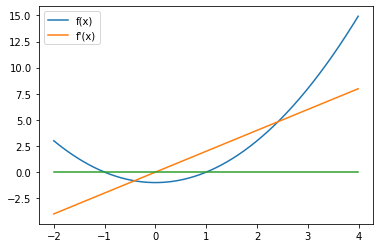

In [4]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: (x ** 2) - 1
fd = lambda x: 2 * x
x = np.arange(-2, 4, 0.01)
zero = np.zeros(len(x))

fx = f(x)
fdx =  fd(x)

plt.plot(x, fx,label='f(x)')
plt.plot(x, fdx,label="f'(x)")
plt.plot(x, zero )
plt.legend()
plt.show()
plt.show()

In [11]:
f = lambda x: (x ** 2) - 1
fder = lambda x: 2 * x
x0 = -10

newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000)

(-1.0000000000139897, 1)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [18]:
# ... ENTER YOUR CODE HERE ...
def newton_multiplicity_iteration(f, fder, x0, m = 1, eps=1e-5, maxiter=1000):

    x1= x0 - m * f(x0)/fder(x0)
    niter = 0

    for _ in range(maxiter):
        if( (abs(x1-x0)<=eps) or (abs(f(x1)) <= 2**(-52)) ):
          niter += 1
          break
        x0 = x1
        x1 = x1 - m*f(x1)/fder(x1)
       
    
    return x1, niter

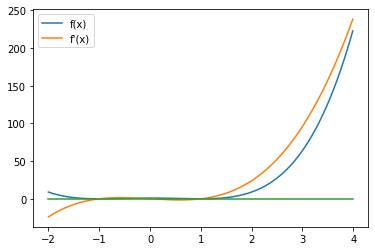

In [14]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: ((x**2) - 1) ** 2 
fd = lambda x: 4 * x *((x ** 2) - 1)

x = np.arange(-2, 4, 0.01)
zero = np.zeros(len(x))

fx = f(x)
fdx =  fd(x)

plt.plot(x, fx,label='f(x)')
plt.plot(x, fdx,label="f'(x)")
plt.plot(x, zero )
plt.legend()
plt.show()

In [20]:
f = lambda x: ((x**2) - 1) ** 2 
fder = lambda x: 4 * x *((x ** 2) - 1)
x0 = 3

newton_multiplicity_iteration(f, fder, x0, m=1, eps=1e-5, maxiter=1000)

(1.0000061918252963, 1)

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # Remove the CWD from sys.path while we load stuff.


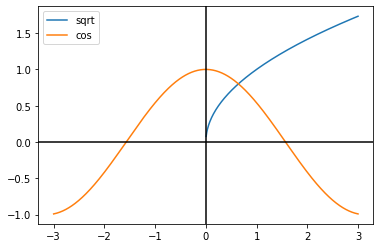

In [27]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

x = np.linspace(-3, 3, 500)

pyplot.plot(x, np.sqrt(x))
pyplot.plot(x, np.cos(x))
plt.legend([1, 2], labels=["sqrt", "cos"])

pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys


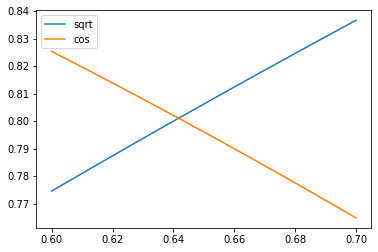

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.6, 0.7, 500)
plt.plot(x, np.sqrt(x))
plt.plot(x, np.cos(x))
plt.legend([1, 2], labels=["sqrt", "cos"])
plt.show()

$$f(x)=\sqrt{x} − \cos{x}$$

$$f′(x) = \frac{1}{2\sqrt{x}}+ \sin{x}$$

The fucntion $\phi(x)$ has a fixed poith where f(x) has a 0

$$x=\phi(x)=x−\alpha f(x)$$

In [30]:
def fixed_point_iteration(f,  x0, alpha =1, eps=1e-5, maxiter=1000):
  
    iter = 1
  
    phi = lambda x: x - alpha*f(x)
    
    x1 = phi(x0) 

    for _ in range(maxiter):
        if( (abs(x1-x0)<=eps) or (abs(phi(x1)-x1) <= 2**(-52)) ):
            break
        x0 = x1
        x1 = phi(x1)
        iter +=1
        
    return x1,iter

In [35]:
import numpy as np

f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1/(2 * np.sqrt(x) ) + np.sin(x)

x0 = 0.7

newton_iteration(f, fder, x0)


(0.6417143708728827, 1)

In [37]:
import numpy as np

f = lambda x: np.sqrt(x) - np.cos(x)

x0 = 0.7

fixed_point_iteration(f,  x0, alpha =1, eps=1e-5, maxiter=1000)

(0.6417127314101916, 7)

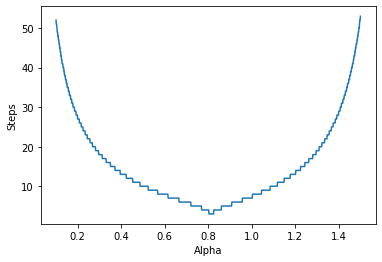

Min =  3


In [39]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(x) - np.cos(x)

x0 = 0.7

alphas=np.linspace(0.1, 1.5, 1000)

steps = []
for a in alphas:
    _,s =  fixed_point_iteration(f,  x0, alpha =a)
    steps.append(s)

import matplotlib.pyplot as plt

plt.plot(alphas,steps)
plt.xlabel("Alpha")
plt.ylabel("Steps")
plt.show()
print("Min = " , np.array(steps).min())

The optimal value of  $\alpha$  is given by

$$\alpha = \frac {2}{m + M}$$

where $0 < m < |f' (x)| < M$ over the localization interval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


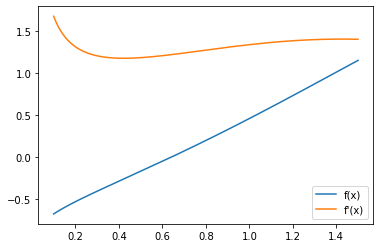


Number of steps for opt_alpha 6


In [41]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(x) - np.cos(x)
fd = lambda x: 1/(2* np.sqrt(x) ) + np.sin(x)

x = np.linspace(0.1,1.5, 500)

plt.plot(x, f(x))
plt.plot(x, fd(x))
plt.legend([1, 2], labels=["f(x)", "f'(x)"])
plt.show()

M = np.abs(fd(x)).max()
m = np.abs(fd(x)).min()

opt_alpha = 2/(m+M)

x0 = 0.7

_,s = fixed_point_iteration(f,  x0, opt_alpha)
print("")
print("Number of steps for opt_alpha", s)

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [42]:
#Tomado de German_Hernandez
import math

x = complex(math.cos(2*math.pi/3), 5)
x

(-0.4999999999999998+5j)

In [46]:
#Tomado de German_Hernandez
import math

r1 = complex(math.cos(2*math.pi/3) ,  math.sin(2*math.pi/3))
r2 = complex(math.cos(2*2*math.pi/3), math.sin(2*2*math.pi/3))
r3 = complex(math.cos(2*3*math.pi/3), math.sin(2*3*math.pi/3))
r1

(-0.4999999999999998+0.8660254037844387j)

In [44]:
#Tomado de German_Hernandez
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 3 - 1

def df(z):
    return 3 * z**2

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m * f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)=z**3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()              


Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


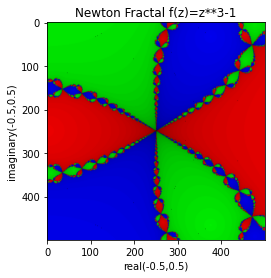

In [45]:
display1(zoom=1)